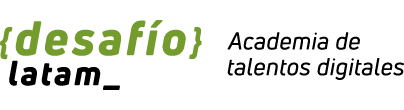

#<center><strong><font color="green">Clasificación</font></strong></center>

Vamos a aplicar el algoritmo KNN directamente, para lo que, como siempre, cargamos las bibliotecas y los datos para el análisis. Utilizaremos la base de datos de cáncer de mama de Wisconsin utilizando la función load_breast_cancer() de scikit-learn. Este conjunto de datos contiene información sobre características calculadas a partir de imágenes digitalizadas de muestras de tejido mamario y se utiliza para predecir si una masa mamaria es benigna o maligna.

In [1]:
import sklearn.datasets as dts
import pandas as pd
dbc = dts.load_breast_cancer()

#creamos un dataFrame y asignamos nombres a las columnas
data = pd.DataFrame(data= dbc['data'], columns=dbc['feature_names'])

'''
se agrega una columna con el nombre de la etiqueta de destino
('malignant' en este caso) y se llena con los valores de la
columna de destino ('target') del conjunto de datos.

'''
data[dbc['target_names'][0]] = dbc['target']

'''
Se selecciona un subconjunto de columnas del DataFrame data utilizando
 la lista cols. Estas columnas corresponden a las características 'mean radius',
  'mean texture', 'mean perimeter', 'mean area' y a la columna de destino
  'malignant'. Luego, se renombran las columnas del subconjunto para tener
  nombres más comprensibles ('radio', 'textura', 'perimetro', 'area', 'maligno').
'''
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'malignant']
d = data.loc[:, cols]
d.columns = ['radio', 'textura', 'perimetro', 'area', 'maligno']

#obtenemos una muestra aleatoria de 10 filas
d.sample(10)

radio  textura  perimetro   area  maligno
230  17.050    19.08     113.40  895.0        0
123  14.500    10.89      94.28  640.7        1
458  13.000    25.13      82.61  520.2        1
555  10.290    27.61      65.67  321.4        1
273   9.742    15.67      61.50  289.9        1
120  11.410    10.82      73.34  403.3        1
159  10.900    12.96      68.69  366.8        1
474  10.880    15.62      70.41  358.9        1
349  11.950    14.96      77.23  426.7        1
384  13.280    13.72      85.79  541.8        1

##<strong><font color="green">El algoritmo KNN en acción</font></strong>

Veremos ahora la aplicación del algoritmo KNN. Nuevamente, comenzamos por cargar las bibliotecas necesarias.

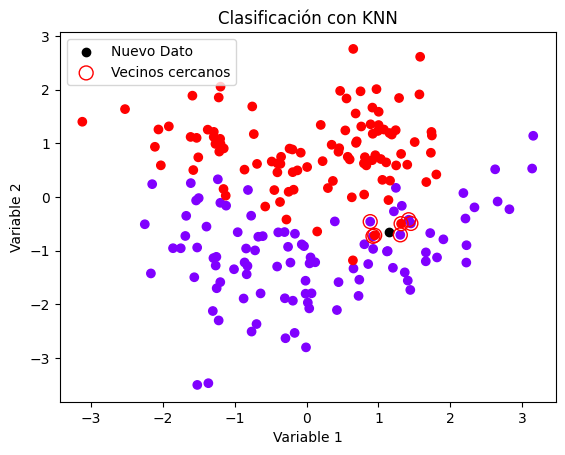

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

'''
Se genera un conjunto de datos de juguete para clasificación utilizando la
función make_classification. El conjunto de datos contiene 200 muestras,
cada una con 2 características (n_features=2). Hay 2 características
informativas y no redundantes (n_informative=2, n_redundant=0). Se generan
2 clusters por clase (n_clusters_per_class=2). Se utiliza una semilla aleatoria
(random_state=4321) para reproducibilidad.
'''
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=4321)

'''
Se crea un clasificador K-Nearest Neighbors (KNN) con 7 vecinos cercanos
(n_neighbors=7) y se entrena utilizando el conjunto de datos X y las etiquetas y.
'''
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Generar un nuevo dato de prueba
new_data = np.array([[1.15, -0.65]])

# Realizar predicciones en el nuevo dato de prueba
prediction = knn.predict(new_data)

# Obtener los k vecinos más cercanos al nuevo dato de prueba, y las distancias respectivas
distances, indices = knn.kneighbors(new_data)

# Plotear los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow')

# Plotear el nuevo dato de prueba
plt.scatter(new_data[:, 0], new_data[:, 1], color='black', marker='o', label='Nuevo Dato')

# Plotear un círculo alrededor de los k vecinos más cercanos
plt.scatter(X[indices, 0], X[indices, 1], facecolors='none', edgecolors='red', marker='o', s=100, label='Vecinos cercanos')

plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Clasificación con KNN')
plt.legend()
plt.show()


Veremos ahora lo que ocurre al considerar este modelo, entrenarlo y probarlo con los últimos datos del conjunto de prueba.

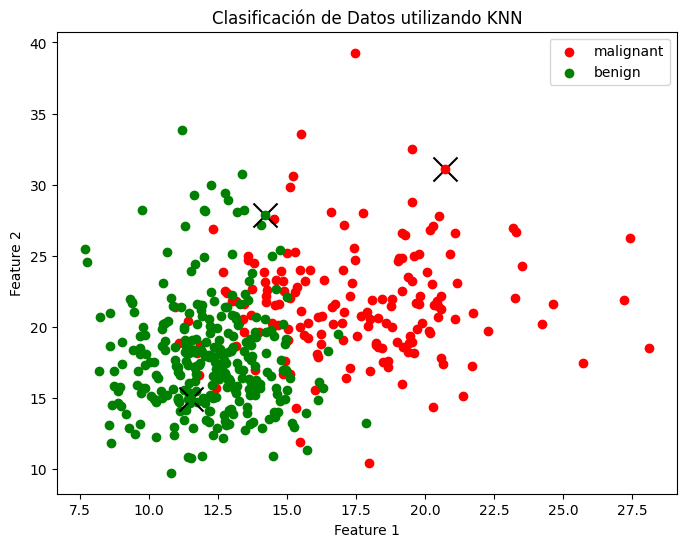

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador KNN con K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn.fit(X_train, y_train)

# Seleccionar los últimos 3 datos del conjunto de prueba (X_test) como nuevos datos para realizar predicciones
new_data = X_test[-3:]

# Realizar predicciones sobre los nuevos datos
predictions = knn.predict(new_data)

#Construimos un gráfico para los datos
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']  # Un color para cada clase

# Graficar los puntos del conjunto de datos original
for i in range(2):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=colors[i], label=data.target_names[i])

# Graficar los nuevos datos junto con las clasificaciones predichas
for i in range(len(new_data)):
    plt.scatter(new_data[i, 0], new_data[i, 1], color='black', marker='x', s=300)
    plt.scatter(new_data[i, 0], new_data[i, 1], color=colors[predictions[i]] )


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clasificación de Datos utilizando KNN')
plt.legend()
plt.show()


##<strong><font color="green">Métricas de desempeño</font></strong>

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Cargar el conjunto de datos Breast Cancer Wisconsin
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Mostrar el informe de métricas de clasificación
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



<center><strong>¡Podemos ahora regresar a nuestra presentación!</strong></center>

###<strong><font color="green">Validación cruzada con KNN</font></strong>

Veremos ahora cómo realizar la validación cruzada, para lo que separaremos el conjunto de datos en subconjuntos de entrenamiento y prueba.

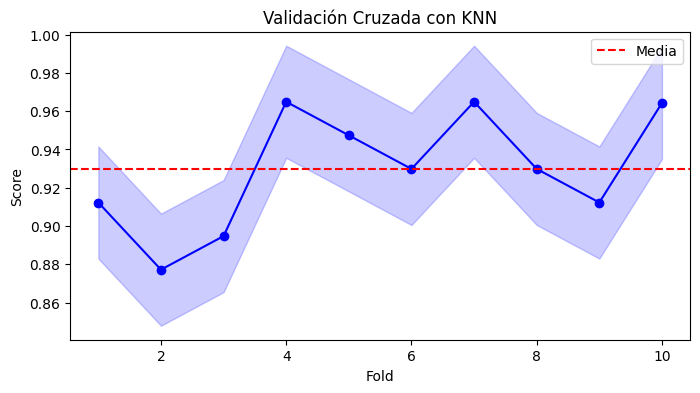

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Cargar el conjunto de datos Breast Cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Crear un clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

'''
Realizar la validación cruzada utilizando el clasificador KNN y el
conjunto de datos completo (X e y) con 10 folds (divisiones). Se obtiene una
matriz de puntuaciones de validación cruzada.
'''
scores = cross_val_score(knn, X, y, cv=10)

# Calcular la media y la desviación estándar de los scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Plotear los resultados de la validación cruzada
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), scores, marker='o', linestyle='-', color='b')
plt.fill_between(range(1, 11), scores - std_score, scores + std_score, alpha=0.2, color='b')
plt.axhline(y=mean_score, color='r', linestyle='--', label='Media')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Validación Cruzada con KNN')
plt.legend()
plt.show()


###<strong><font color="green">Validación Cruzada y valor de k</font></strong>

Buscaremos ahora el mejor valor de k para un clasificador KNN utilizando validación cruzada.

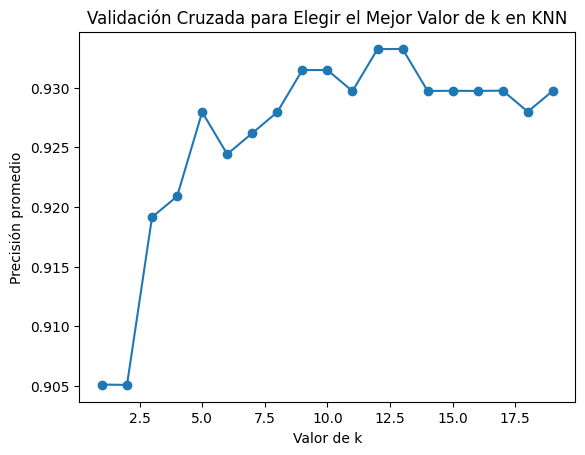

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Cargamos el conjunto de datos Breast Cancer Wisconsin y lo dividimos
data = load_breast_cancer()
X = data.data
y = data.target

# Lista para almacenar las precisiones promedio
mean_scores = []

# Valores de k a probar
k_values = range(1, 20)

# Realizar validación cruzada para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # Validación cruzada con 5 folds
    mean_scores.append(np.mean(scores)) #Se calcula la precisión promedio

# Ploteamos la precisión promedio en función de k
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('Precisión promedio')
plt.title('Validación Cruzada para Elegir el Mejor Valor de k en KNN')
plt.show()


<center><strong>¡Podemos retornar a nuestra presentación!</strong></center>

##<strong><font color="green">Árboles de decisión</font></strong>
###<strong><font color="green">Construyendo el árbol</font></strong>

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_graphviz #permite exportar el árbol
import graphviz #permite ver el árbol

# Características del tiempo (pronóstico y temperatura)
features = [['sunny', 'hot'],
            ['sunny', 'mild'],
            ['overcast', 'hot'],
            ['rainy', 'mild'],
            ['rainy', 'cool'],
            ['rainy', 'cool'],
            ['overcast', 'mild'],
            ['sunny', 'cool']]

# Etiquetas (llevar paraguas o no)
labels = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no']

'''
Creamos un objeto LabelEncoder para codificar las características categóricas
(pronóstico y temperatura) en valores numéricos. Luego, se itera sobre cada
característica en features y se aplica la codificación a cada valor de la
característica utilizando el LabelEncoder. Los valores codificados se almacenan
en la lista features_encoded.
'''
le = preprocessing.LabelEncoder()
features_encoded = []
for i in range(len(features[0])):
    le.fit([row[i] for row in features])
    features_encoded.append(le.transform([row[i] for row in features]))

# Crear el clasificador de árbol de decisión
decision_tree = DecisionTreeClassifier()

# Entrenar el árbol de decisión
decision_tree.fit(list(zip(*features_encoded)), labels)

'''
Exportar el árbol de decisión en formato DOT
Se especifican varios parámetros como los nombres de las características y las
clases, el relleno y la forma de los nodos, y se desactiva la visualización de
la impureza de Gini.
'''
dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=['pronóstico', 'temperatura'],
                           class_names=['no', 'yes'],
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           impurity=False,
                           leaves_parallel=False,
                           # samples_leaf=False
                           )

# Generar el gráfico del árbol de decisión
graph = graphviz.Source(dot_data)

# Guardar el gráfico como archivo de imagen (opcional)
graph.format = 'png'
graph.render('decision_tree')

# Mostrar el gráfico del árbol de decisión
graph.view()

#Para ver el árbol, abrir el archivo en la carpeta de este cuaderno

'decision_tree.png'

###<strong><font color="green">Hiperparámetros</font></strong>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Cargar el dataset Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Definir los valores a probar para los hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Definir el árbol de decisión
tree = DecisionTreeClassifier()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X, y)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Precisión con los mejores hiperparámetros:", best_score)


Mejores hiperparámetros: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión con los mejores hiperparámetros: 0.927899394503959


<center><strong>¡Ahora podemos regresar a nuestra presentación!</strong></center>

##<strong><font color="green">Ejercicio: calidad de vinos</font></strong>

Como siempre, cargamos las bibliotecas y la data necesaria.

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10, 6)

In [10]:
df = pd.read_csv('winequality.csv').drop(columns='Unnamed: 0')

FileNotFoundError: ignored

In [ ]:
df.shape

In [ ]:
rows = 4; cols = int(df.shape[1] / rows)
for index, colname in enumerate(df.columns):
    serie = df[colname]
    plt.subplot(rows, cols, index + 1)
    if colname == 'quality':
        sns.countplot(x=serie)
    else:
        sns.distplot(serie)
        plt.axvline(np.mean(serie), color='tomato')
    plt.title(colname, fontsize=16)
    plt.xlabel('');plt.ylabel('');plt.tight_layout()

In [ ]:
df['quality_bin'] = np.where(df['quality'] > np.mean(df['quality']), 1, 0)
df['quality_bin'].value_counts('%').round(3)

In [ ]:
# Generamos las muestras de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'fixed.acidity':'alcohol'], df['quality_bin'], random_state=11238, test_size=.33)

'''
Se definen dos pipelines, uno para el clasificador KNN (wine_knn) y otro para
el Árbol de Decisión (wine_tree). Cada pipeline consta de dos pasos: primero,
se aplica la transformación de escala estándar (StandardScaler) a los datos,
y luego se aplica el modelo correspondiente (KNeighborsClassifier o
DecisionTreeClassifier).

Un pipeline (también conocido como flujo de trabajo) en el contexto del
aprendizaje automático se refiere a una secuencia de pasos encadenados que
se ejecutan de manera secuencial para procesar y transformar datos, así como
para construir y evaluar modelos de manera más eficiente y organizada. Los
pipelines son una práctica común en el preprocesamiento y modelado de datos,
ya que ayudan a automatizar y sistematizar tareas repetitivas y a garantizar
que se sigan los mismos pasos en múltiples experimentos.
'''
wine_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

wine_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', DecisionTreeClassifier())
])


In [ ]:
'''Cada pipeline se entrena utilizando los datos de entrenamiento
(X_train, y_train), y luego se realizan predicciones en los datos de prueba
(X_test) para calcular el F1-score para cada modelo.
'''

wine_knn.fit(X_train, y_train)
y_hat = wine_knn.predict(X_test)
f1_knn = f1_score(y_test, y_hat)

wine_tree.fit(X_train, y_train)
y_hat = wine_tree.predict(X_test)
f1_tree = f1_score(y_test, y_hat)

print(f'El F1 Score de KNN es: {f1_knn:.3f}')
print(f'El F1 Score del decision tree es: {f1_tree:.3f}')

In [ ]:
'''
Se define una cuadrícula de hiperparámetros (params) que serán explorados
mediante búsqueda exhaustiva (GridSearchCV) en el modelo del Árbol de Decisión.
Los hiperparámetros incluyen min_samples_split, criterion, max_depth y
min_samples_leaf. La búsqueda  se realiza utilizando validación cruzada
con 5 pliegues (cv=5).
'''
params = {'min_samples_split': np.linspace(0.1, 1.0, 5),
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1, 15),
          'min_samples_leaf': np.linspace(0.1, 0.5, 5)
          }

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y su puntaje
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores hiperparámetros:", best_params)
print("Puntaje del modelo con los mejores hiperparámetros:", best_score)

In [ ]:
'''
Se imprime un informe de clasificación utilizando classification_report, que
muestra varias métricas de evaluación del modelo en los datos de prueba, como
precisión, recall, F1-score, entre otros
'''
y_hat = grid_search.predict(X_test)
report_ = classification_report(y_test, y_hat)
print(report_)